In [48]:
import numpy as np
import grid_set as gs
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import imp

imp.reload(gs)

<module 'grid_set' from '/Users/H/WAVES/geo_data_group/grid_set.py'>

In [135]:
# use a basemap projection and start one of my Grid objects
m = Basemap(projection='stere', lon_0=0.0, lat_0=90, lat_ts=70, 
                height = 3335000*2, width = 3335000*2)
GRID = gs.grid_set(m)
# use this method instead of the next stuff if you want
# GRID.load_grid('PIOMAS_np.npz')

In [123]:
43200/240

180.0

In [136]:
dimX = 120
dimY = 360
print(dimX*dimY)

PIOMAS_grid = np.genfromtxt("PIOMAS_grid.dat")
lon = PIOMAS_grid[:4320,:].reshape(dimX,dimY)
lat = PIOMAS_grid[4320:,:].reshape(dimX,dimY)

43200


In [137]:
# put the PIOMAS bit's into the
GRID.set_grid_lon_lat(lon, lat)

Got a grid res =  120  x  360
Note that all grid info is in ny x nx grids, whilst data is in nx x ny


In [138]:
# find the quantities you want
GRID.get_grid_info()

Grid distances calculated:  37511.26392530081  x  35600.12904850892
Angles calculated


In [148]:
# so the previous calculations take a while
# now you can handily save all this using
GRID.save_grid('PIOMAS_np.npz')
# then load it again
# GRID.load_grid('PIOMAS_np.npz')

Grid saved in PIOMAS_np.npz


In [146]:
# areas should just be xdist*ydist between points
grid_areas = GRID.xdist * GRID.ydist

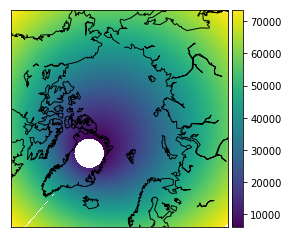

In [184]:
# grid areas in m2
# m.pcolormesh(GRID.xpts,GRID.ypts,grid_areas)
GRID.mplot.pcolormesh(GRID.xpts,GRID.ypts,GRID.xdist)
GRID.mplot.drawcoastlines()
GRID.mplot.colorbar()
plt.show()

In [213]:
# dimX = 360
# dimY = 276
dimX = 276
dimY = 360

PIOMAS_grid = np.genfromtxt("GIOMAS_grid.dat")
lon = PIOMAS_grid[:9936,:].reshape(dimX,dimY)
lat = PIOMAS_grid[9936:,:].reshape(dimX,dimY)
lon_cut = np.array(lon[lat<-50]).reshape(59,dimY)
lat_cut = np.array(lat[lat<-50]).reshape(59,dimY)

In [220]:
# Now Southpole
m = Basemap(projection='spstere', lon_0=0.0, lat_0 = -90,boundinglat=-50)
GRID2 = gs.grid_set(m)
# GRID2.load_grid('GIOMAS_sp.npz')

In [221]:
# put the PIOMAS bit's into the
GRID2.set_grid_lon_lat(lon_cut, lat_cut)

Got a grid res =  59  x  360
Note that all grid info is in ny x nx grids, whilst data is in nx x ny


In [222]:
# find the quantities you want
GRID2.get_grid_info()

Grid distances calculated:  44432.99238763714  x  52594.79658321082
Angles calculated


In [223]:
# so the previous calculations take a while
# now you can handily save all this using
GRID2.save_grid('GIOMAS_sp.npz')
# then load it again
# GRID2.load_grid('GIOMAS_sp.npz')

Grid saved in GIOMAS_sp.npz


In [224]:
# areas should just be xdist*ydist between points
grid_areas = GRID2.xdist * GRID2.ydist

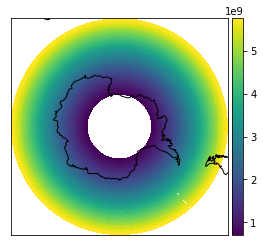

In [226]:
GRID2.mplot.pcolormesh(GRID2.xpts,GRID2.ypts,grid_areas)

GRID2.mplot.drawcoastlines()
GRID2.mplot.colorbar()
# plt.clim([0,1e9])
plt.show()